# Exploratory Data Analysis (EDA) and Feature Engineering

This notebook focuses on:
1. **Exploratory Data Analysis (EDA)**:
   - Understanding data distributions and relationships between features.
   - Identifying correlations and trends relevant to life expectancy.

2. **Feature Engineering**:
   - Cleaning and transforming the dataset.
   - Creating new features to improve predictive power.

The final dataset will be saved for use in the machine learning pipeline.

In [3]:
# Importing all the necessary packages

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [5]:
init_df = pd.read_csv('../data/cleaned/combined_all_years_cleaned.csv')

In [7]:
init_df.head()

County           State  mean_life_expectancy  State_FIPS  \
0  Abbeville County  South Carolina             76.554614          45   
1     Acadia Parish       Louisiana             74.133702          22   
2   Accomack County        Virginia             75.798941          51   
3        Ada County           Idaho             80.699209          16   
4      Adair County            Iowa             78.760544          19   

   County_FIPS  disability_rate  white_population  total_population  \
0            1             19.7           17759.0           25387.0   
1            1             17.9           48543.0           61611.0   
2            1             11.8           22586.0           33454.0   
3            1              9.6          363070.0          394961.0   
4            1             13.7            7457.0            7628.0   

   age_60_and_over  poverty_rate  ...  unemployment_rate  \
0             14.7          20.8  ...               13.7   
1             10.9          19.1  ...                8.6   
2             17.5          20.2  ...                7.0   
3              9.3          12.2  ...                8.5   
4             18.6           9.9  ...                4.0   

   median_household_income  asian_population  per_capita_income  \
0                  35067.0              15.0            17876.0   
1                  38686.0             169.0            19369.0   
2                  40780.0              41.0            22909.0   
3                  55499.0           10244.0            27522.0   
4                  47872.0              46.0            25147.0   

   total_population_race  high_school_only_percentage  median_home_value  \
0                25387.0                         34.8            90300.0   
1                61611.0                         42.2            88900.0   
2                33454.0                         39.3           153800.0   
3               394961.0                         20.8           193300.0   
4                 7628.0                         45.5            96700.0   

   black_population  age_18_and_under_percentage  Year  
0            7144.0                         10.2  2012  
1           11184.0                          9.9  2012  
2            9620.0                          8.0  2012  
3            4057.0                          9.2  2012  
4              11.0                          7.1  2012  

[5 rows x 28 columns]

**Performing some feature engineering to find the percentages of the population belonging to different racial groups:**

In [11]:
init_df['white_percentage'] = (init_df['white_population'] / init_df['total_population_race']) * 100
init_df['black_percentage'] = (init_df['black_population'] / init_df['total_population_race']) * 100
init_df['native_american_percentage'] = (init_df['native_american_population'] / init_df['total_population_race']) * 100
init_df['asian_percentage'] = (init_df['asian_population'] / init_df['total_population_race']) * 100

In [13]:
init_df.head()

County           State  mean_life_expectancy  State_FIPS  \
0  Abbeville County  South Carolina             76.554614          45   
1     Acadia Parish       Louisiana             74.133702          22   
2   Accomack County        Virginia             75.798941          51   
3        Ada County           Idaho             80.699209          16   
4      Adair County            Iowa             78.760544          19   

   County_FIPS  disability_rate  white_population  total_population  \
0            1             19.7           17759.0           25387.0   
1            1             17.9           48543.0           61611.0   
2            1             11.8           22586.0           33454.0   
3            1              9.6          363070.0          394961.0   
4            1             13.7            7457.0            7628.0   

   age_60_and_over  poverty_rate  ...  total_population_race  \
0             14.7          20.8  ...                25387.0   
1             10.9          19.1  ...                61611.0   
2             17.5          20.2  ...                33454.0   
3              9.3          12.2  ...               394961.0   
4             18.6           9.9  ...                 7628.0   

   high_school_only_percentage  median_home_value  black_population  \
0                         34.8            90300.0            7144.0   
1                         42.2            88900.0           11184.0   
2                         39.3           153800.0            9620.0   
3                         20.8           193300.0            4057.0   
4                         45.5            96700.0              11.0   

   age_18_and_under_percentage  Year  white_percentage  black_percentage  \
0                         10.2  2012         69.953126         28.140387   
1                          9.9  2012         78.789502         18.152603   
2                          8.0  2012         67.513601         28.755904   
3                          9.2  2012         91.925532          1.027190   
4                          7.1  2012         97.758259          0.144206   

   native_american_percentage  asian_percentage  
0                    0.070902          0.059085  
1                    0.220740          0.274302  
2                    0.334788          0.122556  
3                    0.536002          2.593674  
4                    0.157315          0.603041  

[5 rows x 32 columns]

In [17]:
init_df.columns

Index(['County', 'State', 'mean_life_expectancy', 'State_FIPS', 'County_FIPS',
       'disability_rate', 'white_population', 'total_population',
       'age_60_and_over', 'poverty_rate', 'housing_cost_burden',
       'bachelors_and_above_percentage', 'median_gross_rent',
       'age_15_to_44_percentage', 'gini_index', 'native_american_population',
       'less_than_9th_grade_percentage', 'health_insurance_rate',
       'unemployment_rate', 'median_household_income', 'asian_population',
       'per_capita_income', 'total_population_race',
       'high_school_only_percentage', 'median_home_value', 'black_population',
       'age_18_and_under_percentage', 'Year', 'white_percentage',
       'black_percentage', 'native_american_percentage', 'asian_percentage'],
      dtype='object')

In [19]:
init_df.drop(columns= ['white_population', 'asian_population', 'black_population', 
                       'native_american_population', 'total_population_race'], inplace=True)

In [21]:
init_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24858 entries, 0 to 24857
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   County                          24858 non-null  object 
 1   State                           24858 non-null  object 
 2   mean_life_expectancy            24858 non-null  float64
 3   State_FIPS                      24858 non-null  int64  
 4   County_FIPS                     24858 non-null  int64  
 5   disability_rate                 24858 non-null  float64
 6   total_population                24858 non-null  float64
 7   age_60_and_over                 24858 non-null  float64
 8   poverty_rate                    24858 non-null  float64
 9   housing_cost_burden             24858 non-null  float64
 10  bachelors_and_above_percentage  24858 non-null  float64
 11  median_gross_rent               24858 non-null  float64
 12  age_15_to_44_percentage         

In [23]:
# Now let us drop the columns that are not relevant for our data analysis
df = init_df.drop(columns=['State_FIPS', 'County_FIPS'])
df.head()

County           State  mean_life_expectancy  disability_rate  \
0  Abbeville County  South Carolina             76.554614             19.7   
1     Acadia Parish       Louisiana             74.133702             17.9   
2   Accomack County        Virginia             75.798941             11.8   
3        Ada County           Idaho             80.699209              9.6   
4      Adair County            Iowa             78.760544             13.7   

   total_population  age_60_and_over  poverty_rate  housing_cost_burden  \
0           25387.0             14.7          20.8                221.0   
1           61611.0             10.9          19.1                339.0   
2           33454.0             17.5          20.2                199.0   
3          394961.0              9.3          12.2               4338.0   
4            7628.0             18.6           9.9                 43.0   

   bachelors_and_above_percentage  median_gross_rent  ...  \
0                            11.7              593.0  ...   
1                             9.3              541.0  ...   
2                            17.3              741.0  ...   
3                            37.8              821.0  ...   
4                            11.5              511.0  ...   

   median_household_income  per_capita_income  high_school_only_percentage  \
0                  35067.0            17876.0                         34.8   
1                  38686.0            19369.0                         42.2   
2                  40780.0            22909.0                         39.3   
3                  55499.0            27522.0                         20.8   
4                  47872.0            25147.0                         45.5   

   median_home_value  age_18_and_under_percentage  Year  white_percentage  \
0            90300.0                         10.2  2012         69.953126   
1            88900.0                          9.9  2012         78.789502   
2           153800.0                          8.0  2012         67.513601   
3           193300.0                          9.2  2012         91.925532   
4            96700.0                          7.1  2012         97.758259   

   black_percentage  native_american_percentage  asian_percentage  
0         28.140387                    0.070902          0.059085  
1         18.152603                    0.220740          0.274302  
2         28.755904                    0.334788          0.122556  
3          1.027190                    0.536002          2.593674  
4          0.144206                    0.157315          0.603041  

[5 rows x 25 columns]

In [91]:
df.describe().transpose()

count           mean            std  \
mean_life_expectancy            24858.0      77.365326       2.560676   
disability_rate                 24858.0      15.703242       4.407639   
total_population                24858.0  101895.308231  324975.256363   
age_60_and_over                 24858.0      18.872476       6.893613   
poverty_rate                    24858.0      16.226442       6.488762   
housing_cost_burden             24858.0    1136.591319    4659.092710   
bachelors_and_above_percentage  24858.0      20.421945       9.404331   
median_gross_rent               24858.0     716.431330     203.878841   
age_15_to_44_percentage         24858.0      63.070822      21.253285   
gini_index                      24858.0       0.442139       0.035156   
less_than_9th_grade_percentage  24858.0       5.771180       3.974378   
health_insurance_rate           24858.0      61.014265      36.135931   
unemployment_rate               24858.0       7.352816       3.585767   
median_household_income         24858.0   48453.157937   13020.962684   
per_capita_income               24858.0   25161.743785    6210.782632   
high_school_only_percentage     24858.0      35.123739       7.408203   
median_home_value               24858.0  138599.223590   83524.750617   
age_18_and_under_percentage     24858.0      14.320927       7.214341   
Year                            24858.0    2015.498753       2.291527   
white_percentage                24858.0      83.381396      16.668344   
black_percentage                24858.0       9.096423      14.545917   
native_american_percentage      24858.0       1.892145       7.413599   
asian_percentage                24858.0       1.288062       2.689316   

                                         min           25%            50%  \
mean_life_expectancy               66.047153     75.614112      77.491757   
disability_rate                     3.700000     12.600000      15.300000   
total_population                  607.000000  11392.250000   26136.500000   
age_60_and_over                     2.000000     13.600000      17.400000   
poverty_rate                        2.300000     11.600000      15.400000   
housing_cost_burden                 0.000000     69.000000     196.000000   
bachelors_and_above_percentage      2.800000     13.900000      18.200000   
median_gross_rent                  99.000000    587.000000     667.000000   
age_15_to_44_percentage            16.100000     37.700000      76.800000   
gini_index                          0.302300      0.418100       0.439800   
less_than_9th_grade_percentage      0.000000      3.100000       4.700000   
health_insurance_rate               2.500000     16.800000      84.700000   
unemployment_rate                   0.000000      4.900000       6.900000   
median_household_income         18972.000000  39947.750000   46552.500000   
per_capita_income                8200.000000  21026.250000   24294.500000   
high_school_only_percentage         5.400000     30.400000      35.500000   
median_home_value               19400.000000  88000.000000  115800.000000   
age_18_and_under_percentage         0.000000      8.300000      10.600000   
Year                             2012.000000   2013.000000    2015.000000   
white_percentage                    3.110111     76.885511      89.879518   
black_percentage                    0.000000      0.627495       2.265406   
native_american_percentage          0.000000      0.159731       0.339482   
asian_percentage                    0.000000      0.255455       0.565004   

                                          75%           max  
mean_life_expectancy                79.068485  9.225386e+01  
disability_rate                     18.400000  3.690000e+01  
total_population                 68324.250000  1.010572e+07  
age_60_and_over                     23.700000  6.540000e+01  
poverty_rate                        19.700000  5.550000e+01  
housing_cost_burden                610.000000  1.631040e+05 

**Making a pairplot by selecting a subset of features:**

In [27]:
important_features = [
    'mean_life_expectancy',             
    'median_household_income',
    'poverty_rate',
    'health_insurance_rate',
    'bachelors_and_above_percentage',
    'age_60_and_over',
    'disability_rate',
    'gini_index',
    'median_home_value',
    'black_percentage',
    'per_capita_income'
]

<Figure size 1200x1000 with 0 Axes>

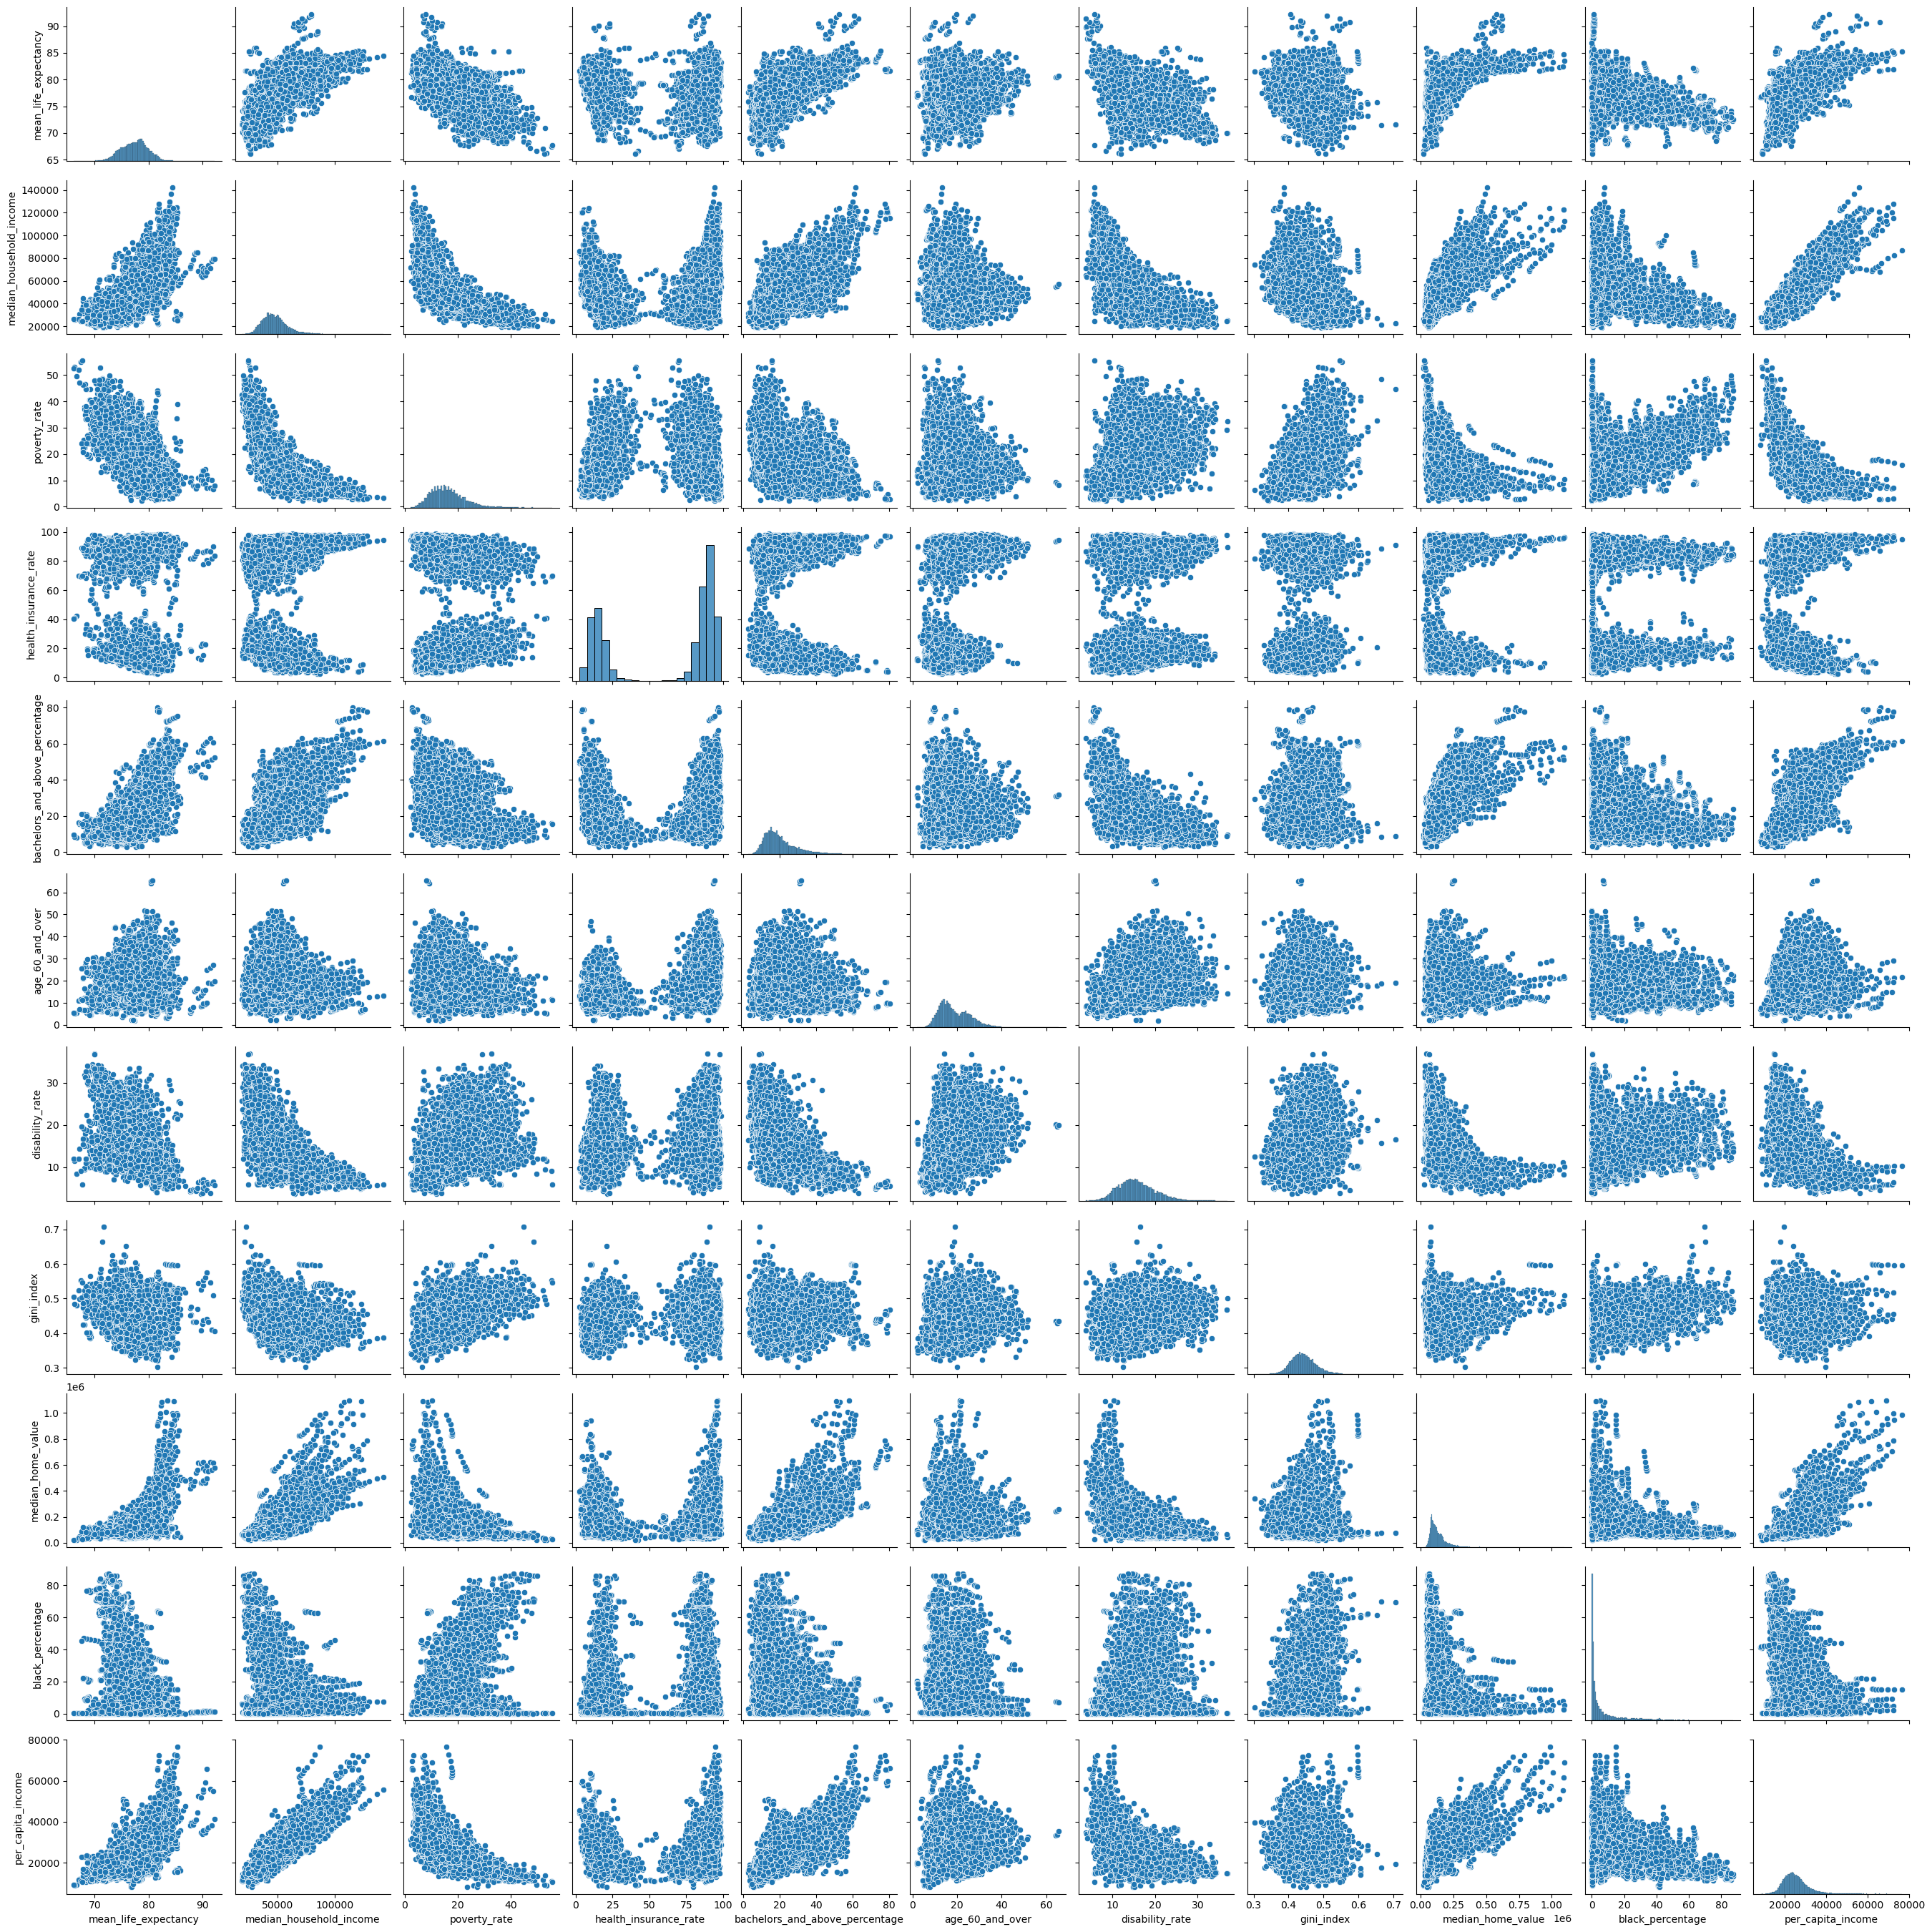

In [29]:
plt.figure(figsize=(12,10))
sns.pairplot(data = df[important_features])
plt.savefig('../outputs/pairplot.png')

**There are several interesting observations to be made here:**

**1) Features like median_household_income and per_capita_income seem to have a strong positive relationship with mean_life_expectancy.**

**2) In contrast, features like poverty_rate, disability_rate, and gini_index seem to have a negative relationship (as expected).**

**3) The median_household_income and per_capita_income seem to be strongly correlated with each other. We might drop one of these features later to prevent overfitting.**

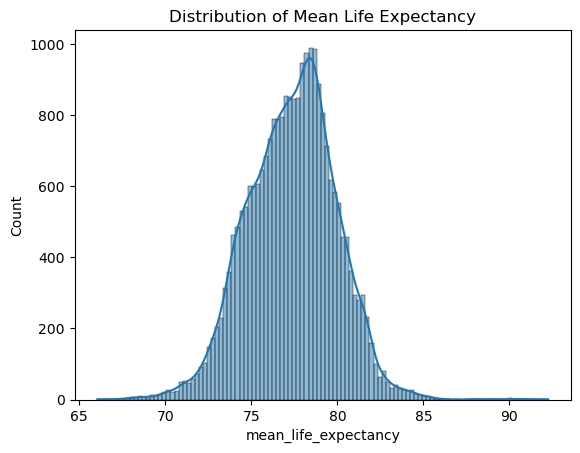

In [32]:
sns.histplot(data = df, x = df['mean_life_expectancy'], kde=True)
plt.title('Distribution of Mean Life Expectancy')
plt.savefig('../outputs/disribution_life_expectancy.png')
plt.show()

**The distrinution for mean_life_expectancy seems to be normally distributed and roughly symmetrical, although it seems to be slightly left-skewed, suggesting that a few counties might have unusually low life expectancies.**

**Let's look at the counties that have life expectancies below 70 and above 80. This will help us identify the outliers in the data set.**

In [35]:
low_life_exp = df[df['mean_life_expectancy'] < 70]
low_life_exp

County          State  mean_life_expectancy  disability_rate  \
1831    McDowell County  West Virginia             68.878692             31.8   
2432   Roosevelt County        Montana             69.669884             11.3   
2577     Shannon County   South Dakota             66.686695              8.5   
2614       Sioux County   North Dakota             69.180948             12.6   
2773        Todd County   South Dakota             68.467172             16.2   
...                 ...            ...                   ...              ...   
23954      Perry County       Kentucky             68.744949             30.5   
23963   Petersburg City       Virginia             68.542338             22.4   
24363      Sioux County   North Dakota             68.402908             12.0   
24522       Todd County   South Dakota             67.696662              5.8   
24568      Union County        Florida             67.777653             15.4   

       total_population  age_60_and_over  poverty_rate  housing_cost_burden  \
1831            21966.0             14.4          33.5                102.0   
2432            10477.0              9.4          21.9                 70.0   
2577            13683.0              5.3          49.5                 82.0   
2614             4193.0              6.0          44.8                 11.0   
2773             9711.0              5.5          44.6                124.0   
...                 ...              ...           ...                  ...   
23954           26624.0             23.4          26.1                 97.0   
23963           31362.0             23.9          24.1                516.0   
24363            4373.0             11.9          38.2                 23.0   
24522           10195.0             11.3          55.5                 74.0   
24568           15303.0             21.2          20.8                 89.0   

       bachelors_and_above_percentage  median_gross_rent  ...  \
1831                              5.4              453.0  ...   
2432                             13.8              386.0  ...   
2577                              7.9              399.0  ...   
2614                              9.2              417.0  ...   
2773                             12.9              460.0  ...   
...                               ...                ...  ...   
23954                            14.4              649.0  ...   
23963                            19.8              947.0  ...   
24363                            15.0              450.0  ...   
24522                            15.6              429.0  ...   
24568                             9.2              657.0  ...   

       median_household_income  per_capita_income  \
1831                   22972.0            13917.0   
2432                   40146.0            17758.0   
2577                   26282.0             9136.0   
2614                   30799.0            14265.0   
2773                   30972.0            11417.0   
...                        ...                ...   
23954                  33640.0            23135.0   
23963                  38679.0            23611.0   
24363                  38939.0            15649.0   
24522                  24331.0            10739.0   
24568                  44270.0            17010.0   

       high_school_only_percentage  median_home_value  \
1831                          36.7            33900.0   
2432                          40.8            64800.0   
2577                          37.0            19400.0   
2614                          32.5            59800.0   
2773                          27.6            50700.0   
...                            ...                ...   
23954                         33.0            75400.0   
23963                         35.7           108100.0   
24363                         32.4            83800.0   
24522                         31.7            26000.0   
24568                         37.4           11840

**Let's look at which states have the most number of counties with a very low life expectancy.**

In [38]:
low_life_exp['State'].value_counts()

State
Kentucky         25
South Dakota     19
West Virginia    11
Virginia         10
North Dakota      8
Florida           8
Montana           7
Alaska            3
Name: count, dtype: int64

In [40]:
high_life_exp = df[df['mean_life_expectancy'] > 80]
high_life_exp

County       State  mean_life_expectancy  \
3                    Ada County       Idaho             80.699209   
8                  Adams County    Colorado             80.065177   
9                  Adams County       Idaho             80.651258   
20               Addison County     Vermont             80.716196   
25               Alameda County  California             81.591711   
...                         ...         ...                   ...   
24832  Yakutat City and Borough      Alaska             81.545654   
24834            Yamhill County      Oregon             80.182842   
24841    Yellow Medicine County   Minnesota             80.221016   
24844               Yolo County  California             81.315994   
24853               Yuma County     Arizona             81.435390   

       disability_rate  total_population  age_60_and_over  poverty_rate  \
3                  9.6          394961.0              9.3          12.2   
8                  9.5          442996.0              7.3          14.2   
9                 22.7            3976.0             23.3          13.8   
20                12.3           36814.0             12.7          11.1   
25                 9.2         1515136.0              9.8          12.0   
...                ...               ...              ...           ...   
24832             11.1             649.0             21.6           7.4   
24834             15.4          104831.0             23.2          12.1   
24841             13.1            9814.0             28.4          11.8   
24844              9.6          217352.0             17.0          19.1   
24853             12.0          209468.0             23.5          19.4   

       housing_cost_burden  bachelors_and_above_percentage  median_gross_rent  \
3                   4338.0                            37.8              821.0   
8                   5251.0                            20.5              947.0   
9                     28.0                            20.4              564.0   
20                   369.0                            31.5              877.0   
25                 21987.0                            41.1             1265.0   
...                    ...                             ...                ...   
24832                  2.0                            22.6              900.0   
24834                701.0                            26.9             1052.0   
24841                103.0                            17.2              584.0   
24844               3179.0                            41.4             1324.0   
24853               1669.0                            15.0              839.0   

       ...  median_household_income  per_capita_income  \
3      ...                  55499.0            27522.0   
8      ...                  56633.0            24357.0   
9      ...                  35756.0            20462.0   
20     ...                  57785.0            28550.0   
25     ...                  71516.0            35434.0   
...    ...                      ...                ...   
24832  ...                  71607.0            32198.0   
24834  ...                  63902.0            31314.0   
24841  ...                  59210.0            29908.0   
24844  ...                  70228.0            34515.0   
24853  ...                  45243.0            21758.0   

       high_school_only_percentage  median_home_value  \
3                             20.8           193300.0   
8                             30.4           188100.0   
9                             36.6           142900.0   
20                            35.0           235500.0   
25                            19.8           514900.0   
...                            ...                ...   
24832                         33.5           202300.0   
24834                         24.6           295900.0   
24841                         35.4           110000.0   
24844                         18.1           424900.0  

**Now doing the same with the states with many high life expectancy counties.**

In [43]:
high_life_exp['State'].value_counts()

State
Minnesota         392
Colorado          234
California        203
Iowa              200
Wisconsin         185
Nebraska          172
South Dakota      164
Virginia          158
Washington        141
New York          139
Texas             131
North Dakota      120
Florida           109
New Jersey         82
Oregon             81
Idaho              80
Montana            75
Michigan           71
Pennsylvania       69
Illinois           68
Utah               67
Massachusetts      64
Alaska             61
Connecticut        51
Georgia            47
North Carolina     43
Maryland           42
Arizona            35
Vermont            33
Hawaii             31
Wyoming            31
Kansas             30
Ohio               30
Rhode Island       24
New Hampshire      21
New Mexico         20
Missouri           19
Nevada             15
Indiana            13
Maine               9
South Carolina      8
Tennessee           8
Alabama             2
Name: count, dtype: int64

**Let's try to find the county that has the highest mean life expectancy.**

In [46]:
df[df['mean_life_expectancy'] == df['mean_life_expectancy'].max()]

County     State  mean_life_expectancy  disability_rate  \
24444  Summit County  Colorado             92.253858              5.7   

       total_population  age_60_and_over  poverty_rate  housing_cost_burden  \
24444           30649.0             19.6           8.0                464.0   

       bachelors_and_above_percentage  median_gross_rent  ...  \
24444                            52.4             1393.0  ...   

       median_household_income  per_capita_income  \
24444                  79277.0            41281.0   

       high_school_only_percentage  median_home_value  \
24444                         18.0           579600.0   

       age_18_and_under_percentage  Year  white_percentage  black_percentage  \
24444                         16.2  2019         91.285197           1.11586   

       native_american_percentage  asian_percentage  
24444                    0.362165          0.584032  

[1 rows x 25 columns]

**Now the one with the lowest life expectancy.**

In [49]:
df[df['mean_life_expectancy'] == df['mean_life_expectancy'].min()]

County         State  mean_life_expectancy  disability_rate  \
8796  Shannon County  South Dakota             66.047153             12.0   

      total_population  age_60_and_over  poverty_rate  housing_cost_burden  \
8796           14005.0              5.4          52.6                 75.0   

      bachelors_and_above_percentage  median_gross_rent  ...  \
8796                             9.7              431.0  ...   

      median_household_income  per_capita_income  high_school_only_percentage  \
8796                  26383.0             9226.0                         33.1   

      median_home_value  age_18_and_under_percentage  Year  white_percentage  \
8796            20000.0                         13.1  2014          4.405569   

      black_percentage  native_american_percentage  asian_percentage  
8796          0.128526                   94.609068          0.014281  

[1 rows x 25 columns]

**Notice how the poverty rate in this county is 52.6%, a significantly high number. The unemployment rate also seems to be quite high. Later in the project when we do feature rankings, we will see how influential these variables are when predicting mean life expectancy.**

**Now let's try to make the box plot to see the distribution of mean life expectancy across different states.**

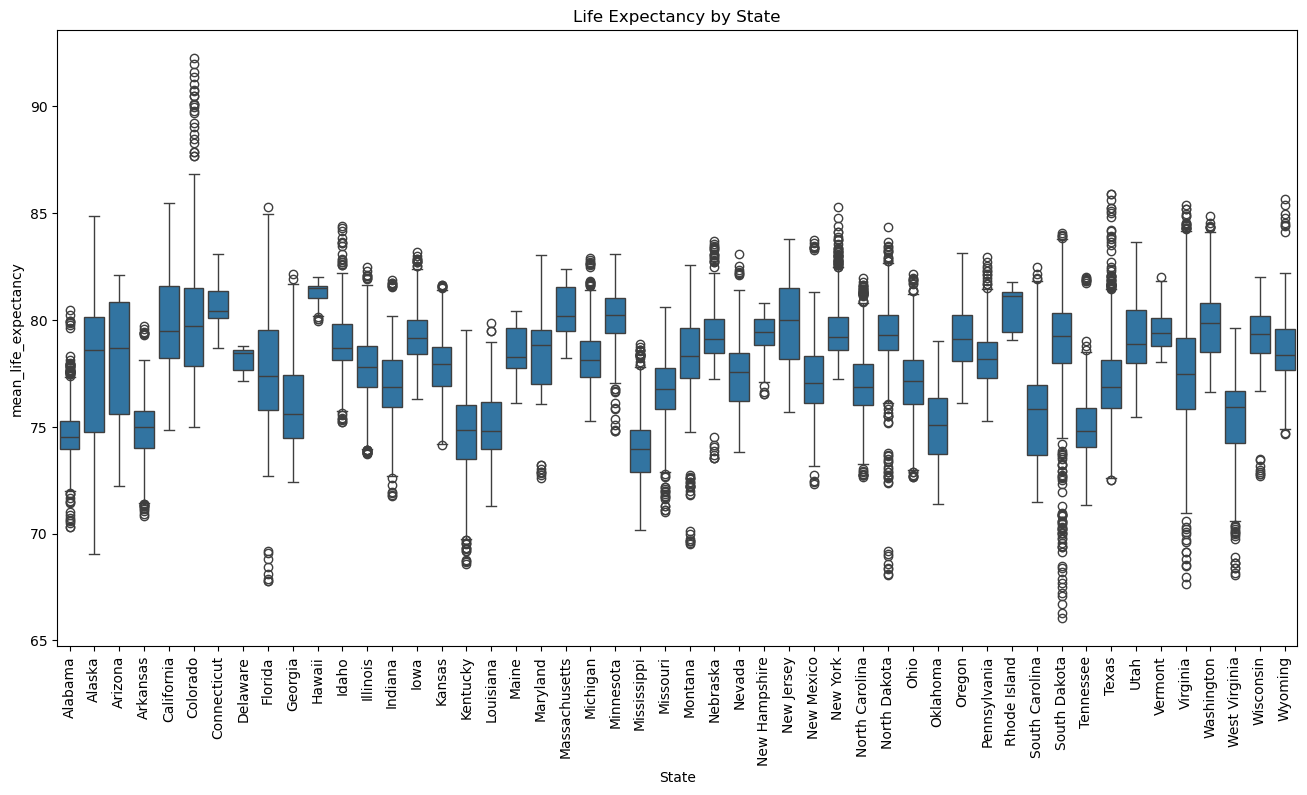

In [53]:
plt.figure(figsize=(16,8))
states_order = sorted(df['State'].unique())
sns.boxplot(data=df, x='State', y='mean_life_expectancy', order = states_order)
plt.xticks(rotation=90)
plt.title("Life Expectancy by State")
plt.savefig('../outputs/boxplot.png', bbox_inches='tight')
plt.show()

**Note: There seems to be a wide variation in life expectancy across different states. Some states (e.g., Hawaii, California, and Minnesota) have higher medians and fewer outliers on the lower end.States like Kentucky, West Virginia, and South Dakota have lower medians and many outliers below the 25th percentile, suggesting more counties with significantly lower life expectancy. States such as Mississippi, Kentucky, and West Virginia show many outliers on the lower end, which aligns with their counties having some of the lowest life expectancies.**

**Similarly, let's try to make the box plot for counties with very high and very low life expectancies.**

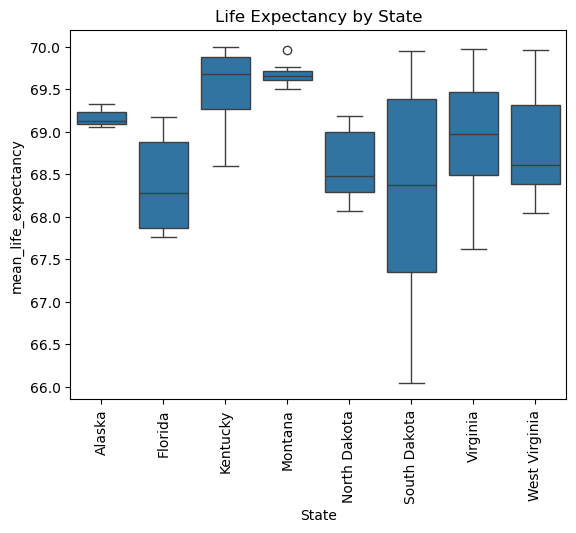

In [57]:
states_order = sorted(low_life_exp['State'].unique())
sns.boxplot(data=low_life_exp, x='State', y='mean_life_expectancy', order = states_order)
plt.xticks(rotation=90)
plt.title("Life Expectancy by State")
plt.savefig('../outputs/boxplot_low_life_exp.png', bbox_inches='tight')
plt.show()

**Note: South Dakota shows the widest range of life expectancy values, indicating significant variation across counties in the state. The presence of outliers in Montana suggests that some counties deviate significantly from the overall state trend, which could be something that could warrant further investigation.**

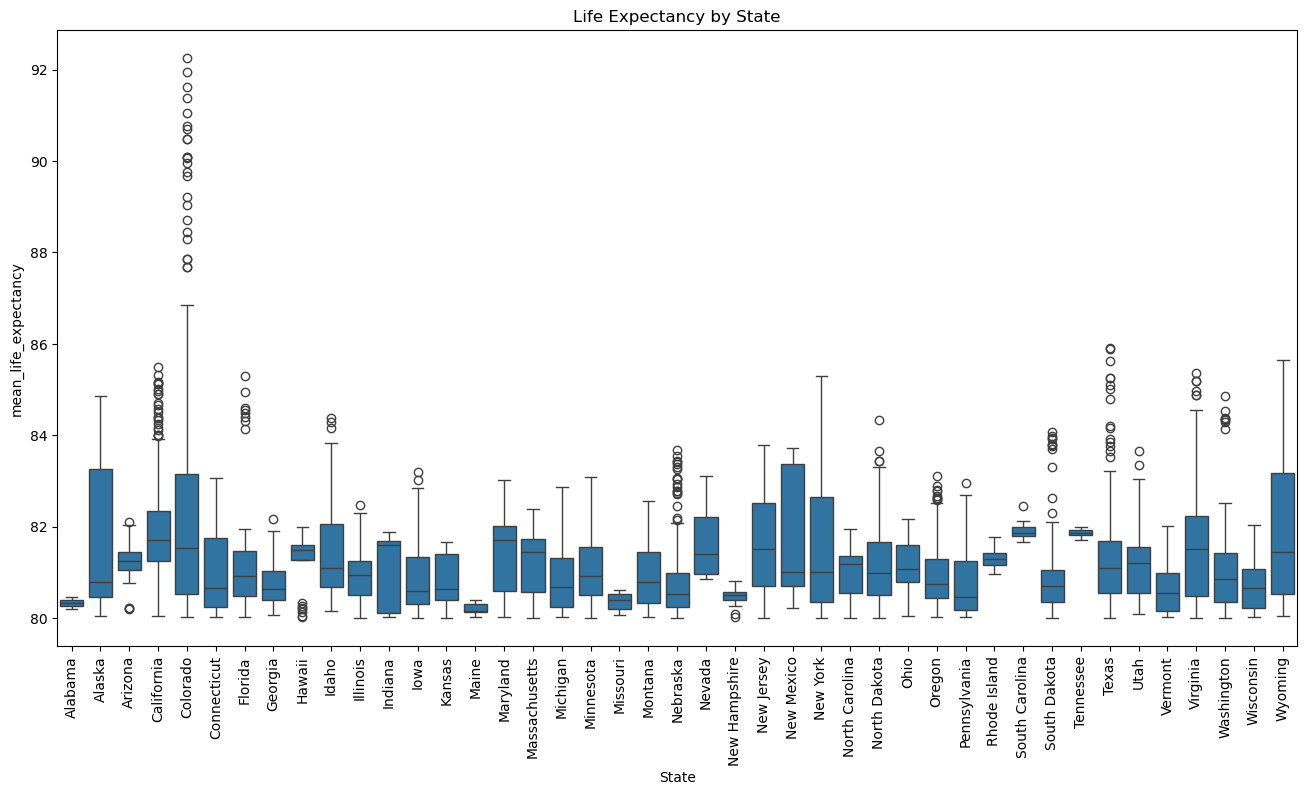

In [60]:
plt.figure(figsize=(16,8))
states_order = sorted(high_life_exp['State'].unique())
sns.boxplot(data= high_life_exp, x='State', y='mean_life_expectancy', order = states_order)
plt.xticks(rotation=90)
plt.title("Life Expectancy by State")
plt.savefig('../outputs/boxplot_high_life_exp.png', bbox_inches='tight')
plt.show()

**Note: California and Colorado seem to have high upper bounds, with some counties showing exceptionally high life expectancy. Interesting.**

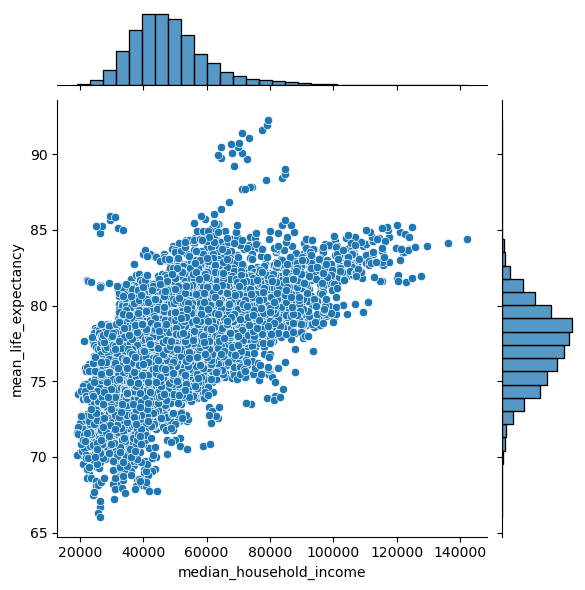

In [63]:
sns.jointplot(data=df, x='median_household_income', y='mean_life_expectancy', kind="scatter", marginal_kws=dict(bins=30, fill=True))
plt.savefig('../outputs/jointplot_mhi_mle.png', bbox_inches = 'tight')
plt.show()

**Let's now try to find the correlation between the different features.**

In [66]:
df.columns

Index(['County', 'State', 'mean_life_expectancy', 'disability_rate',
       'total_population', 'age_60_and_over', 'poverty_rate',
       'housing_cost_burden', 'bachelors_and_above_percentage',
       'median_gross_rent', 'age_15_to_44_percentage', 'gini_index',
       'less_than_9th_grade_percentage', 'health_insurance_rate',
       'unemployment_rate', 'median_household_income', 'per_capita_income',
       'high_school_only_percentage', 'median_home_value',
       'age_18_and_under_percentage', 'Year', 'white_percentage',
       'black_percentage', 'native_american_percentage', 'asian_percentage'],
      dtype='object')

In [68]:
selected_features = ['mean_life_expectancy', 'disability_rate',
       'total_population', 'age_60_and_over', 'poverty_rate',
       'housing_cost_burden', 'bachelors_and_above_percentage',
       'median_gross_rent', 'age_15_to_44_percentage', 'gini_index',
       'less_than_9th_grade_percentage', 'health_insurance_rate',
       'unemployment_rate', 'median_household_income', 'per_capita_income',
       'high_school_only_percentage', 'median_home_value',
       'age_18_and_under_percentage', 'white_percentage',
       'black_percentage', 'native_american_percentage', 'asian_percentage']

In [70]:
df[selected_features].corr()

mean_life_expectancy  disability_rate  \
mean_life_expectancy                        1.000000        -0.635294   
disability_rate                            -0.635294         1.000000   
total_population                            0.200416        -0.233820   
age_60_and_over                             0.019345         0.309915   
poverty_rate                               -0.649895         0.504959   
housing_cost_burden                         0.178472        -0.199447   
bachelors_and_above_percentage              0.635201        -0.589465   
median_gross_rent                           0.477932        -0.498278   
age_15_to_44_percentage                     0.040628        -0.042840   
gini_index                                 -0.280322         0.223957   
less_than_9th_grade_percentage             -0.305945         0.269054   
health_insurance_rate                      -0.037553         0.045295   
unemployment_rate                          -0.444288         0.359912   
median_household_income                     0.649629        -0.665745   
per_capita_income                           0.659090        -0.565927   
high_school_only_percentage                -0.459291         0.447915   
median_home_value                           0.582302        -0.475105   
age_18_and_under_percentage                -0.041557        -0.079752   
white_percentage                            0.317197        -0.000518   
black_percentage                           -0.377160         0.127745   
native_american_percentage                 -0.174553        -0.036451   
asian_percentage                            0.343990        -0.344965   

                                total_population  age_60_and_over  \
mean_life_expectancy                    0.200416         0.019345   
disability_rate                        -0.233820         0.309915   
total_population                        1.000000        -0.143725   
age_60_and_over                        -0.143725         1.000000   
poverty_rate                           -0.067900        -0.131895   
housing_cost_burden                     0.971019        -0.127011   
bachelors_and_above_percentage          0.325628        -0.060017   
median_gross_rent                       0.410918        -0.122802   
age_15_to_44_percentage                 0.009098        -0.729580   
gini_index                              0.145136         0.045865   
less_than_9th_grade_percentage         -0.002309        -0.204208   
health_insurance_rate                   0.007054         0.489483   
unemployment_rate                       0.036232        -0.320118   
median_household_income                 0.246441        -0.042651   
per_capita_income                       0.252913         0.162882   
high_school_only_percentage            -0.314421         0.117785   
median_home_value                       0.365284        -0.052701   
age_18_and_under_percentage             0.032874         0.436492   
white_percentage                       -0.186632         0.239135   
black_percentage                        0.074494        -0.150734   
native_american_percentage             -0.045369        -0.082505   
asian_percentage                        0.453493        -0.181934   

                                poverty_rate  housing_cost_burden  \
mean_life_expectancy               -0.649895             0.178472   
disability_rate                     0.504959            -0.199447   
total_population                   -0.067900             0.971019   
age_60_and_over                    -0.131895            -0.127011   
poverty_rate                        1.000000            -0.034673   
housing_cost_burden                -0.034673             1.000000   
bachelors_and_above_percentage     -0.433161             0.288489   
median_gross_rent                  -0.393212             0.363794   
age_15_to_44_percentage             0.082813             0.009813   
gini_index                          0.557528             0.163248   
less_

**Plotting the feature correlation heatmap.**

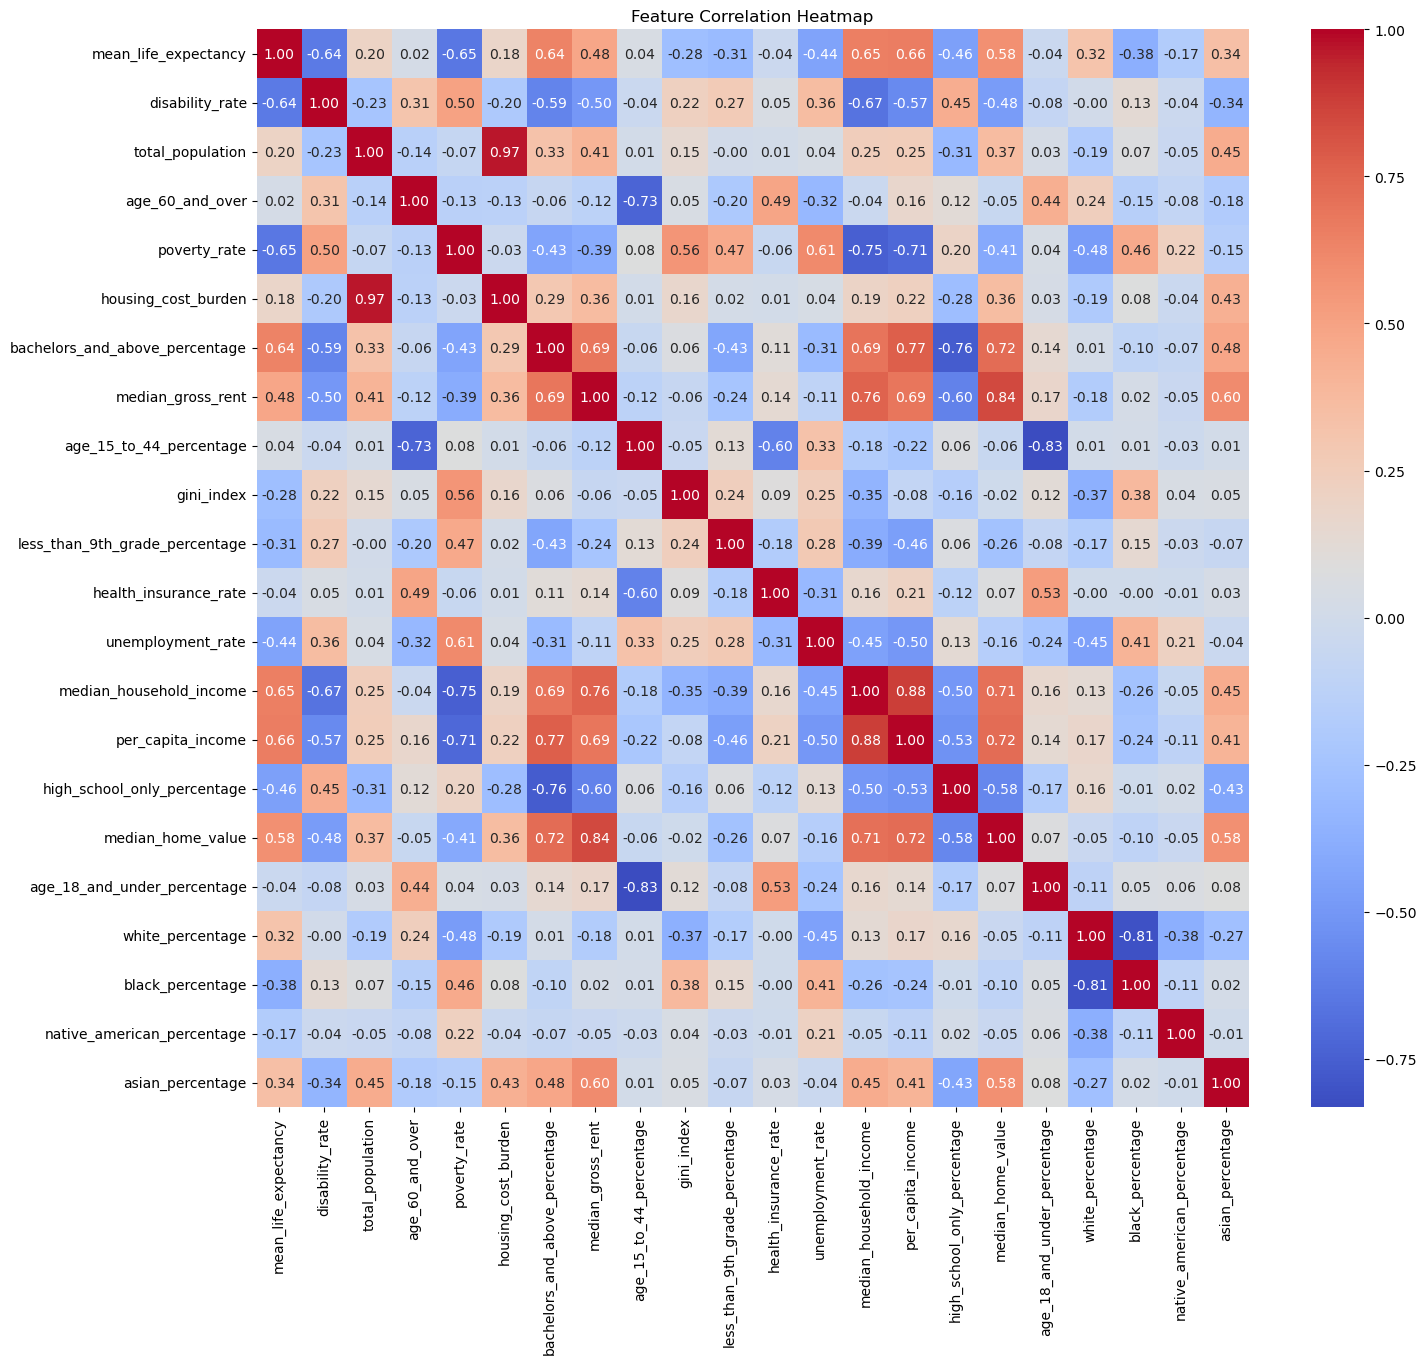

In [79]:
plt.figure(figsize=(16,14))
sns.heatmap(data = df[selected_features].corr(), annot= True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.savefig('../outputs/correlation_heatmap.png', bbox_inches = 'tight')  # Save the heatmap
plt.show()

**Note:** 

**1) The following features seem to how strong positive correlation with the mean life expectancy: median_household_income (0.65), health_insurance_rate (0.65), bachelors_and_above_percentage (0.64), per_capita_income (0.66).**

**2) Poverty_rate (-0.65) and disability_rate (-0.64) seem to show a strong negative correlation.**

**3) Bachelors_and_above_percentage and median_household_income seems to be strongly correlated, suggesting counties with higher 
educational attainment tend to have higher household income.**

**4) The features that have a very high correlation (housing_cost_burden and total_population) can be combined together to prevent multicollinearity. Alternatively, you can also drop of the the highly correlated features to prevent redundancy.**

**Now let us plot the distributions of features that are strongly correlated with mean life expectancy:**

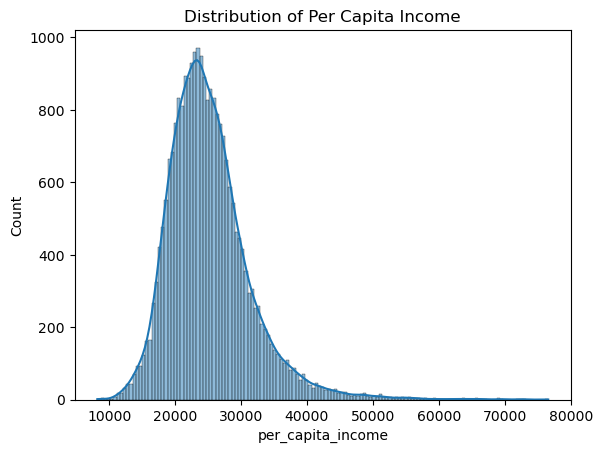

In [94]:
sns.histplot(data = df, x = df['per_capita_income'], kde=True)
plt.title('Distribution of Per Capita Income')
plt.savefig('../outputs/disribution_per_capita.png')
plt.show()

**The distrinution appears to be right-skewed, suggesting that that while most individuals have a relatively modest per capita income, there are a smaller number of counties with significantly higher incomes.**

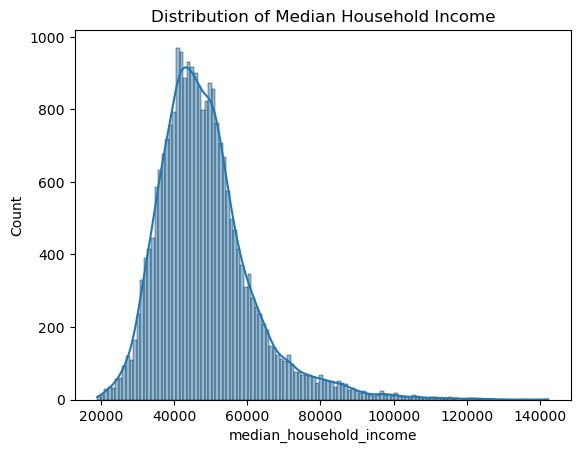

In [96]:
sns.histplot(data = df, x = df['median_household_income'], kde=True)
plt.title('Distribution of Median Household Income')
plt.savefig('../outputs/disribution_median_household_income.png')
plt.show()

**Roughly the same trend as the per capita income.**

**Since higher educational levels was found to be strongly correlated with higher mean life expectancy, let's try to make a box plot to see which states have counties that have higher percentage of people with educatinal level of bachlor's or higher:**

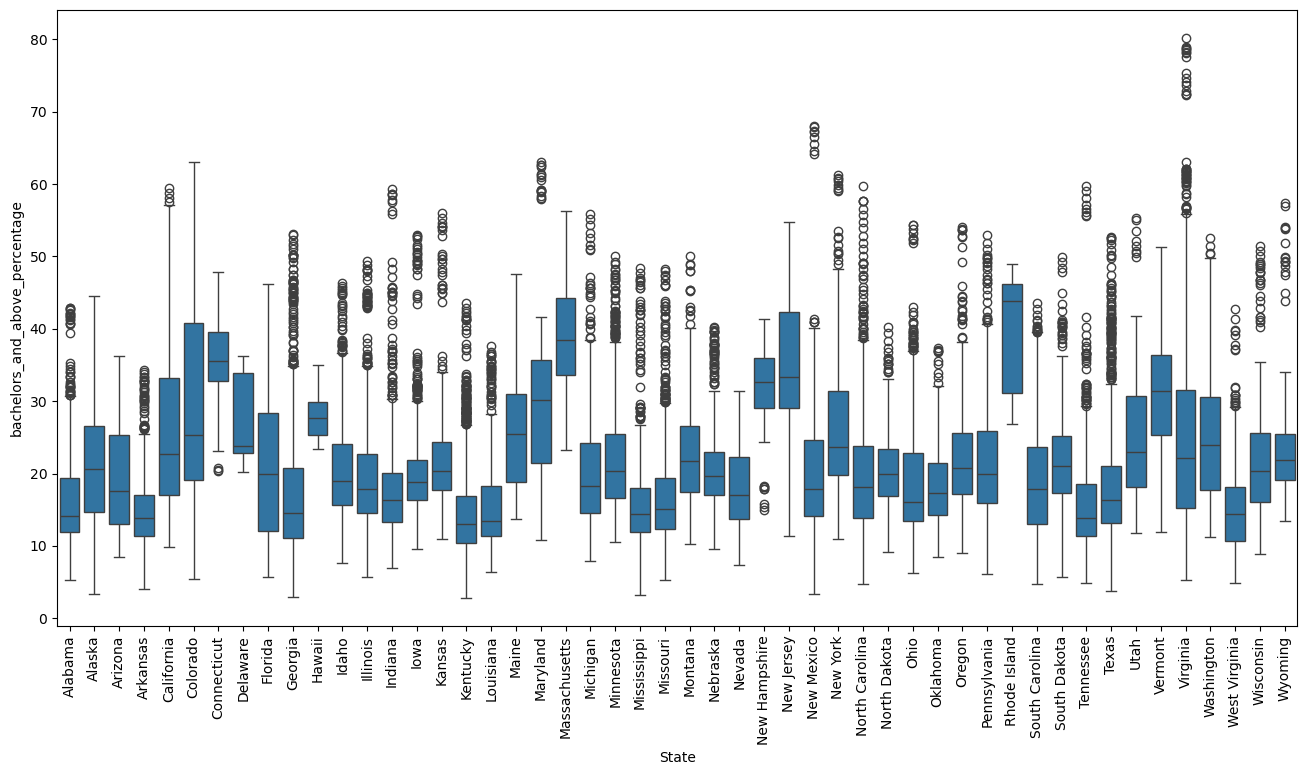

In [133]:
plt.figure(figsize=(16,8))
sns.boxplot(data = df, x = df['State'], y = df['bachelors_and_above_percentage'], order = sorted(df['State'].unique()))
plt.xticks(rotation=90)
plt.savefig('../outputs/box_plot_education.png', bbox_inches = 'tight')
plt.show()

**Let's now do a time series analysis of the states with very high and very low mean life expectancies.**

In [139]:
state_trends = df.groupby(['Year', 'State'])['mean_life_expectancy'].mean().reset_index()
state_trends.head()

Year       State  mean_life_expectancy
0  2012     Alabama             74.842975
1  2012      Alaska             77.269531
2  2012     Arizona             78.532166
3  2012    Arkansas             75.095674
4  2012  California             79.764605

In [143]:
state_trends_low = low_life_exp.groupby(['Year', 'State'])['mean_life_expectancy'].mean().reset_index()
state_trends_low.head()

Year         State  mean_life_expectancy
0  2012        Alaska             69.321326
1  2012       Florida             69.172532
2  2012       Montana             69.669884
3  2012  North Dakota             69.180948
4  2012  South Dakota             67.576933

In [147]:
state_trends_high = high_life_exp.groupby(['Year', 'State'])['mean_life_expectancy'].mean().reset_index()
state_trends_high.head()

Year        State  mean_life_expectancy
0  2012       Alaska             81.571182
1  2012      Arizona             81.144018
2  2012   California             81.712973
3  2012     Colorado             82.142361
4  2012  Connecticut             80.974415

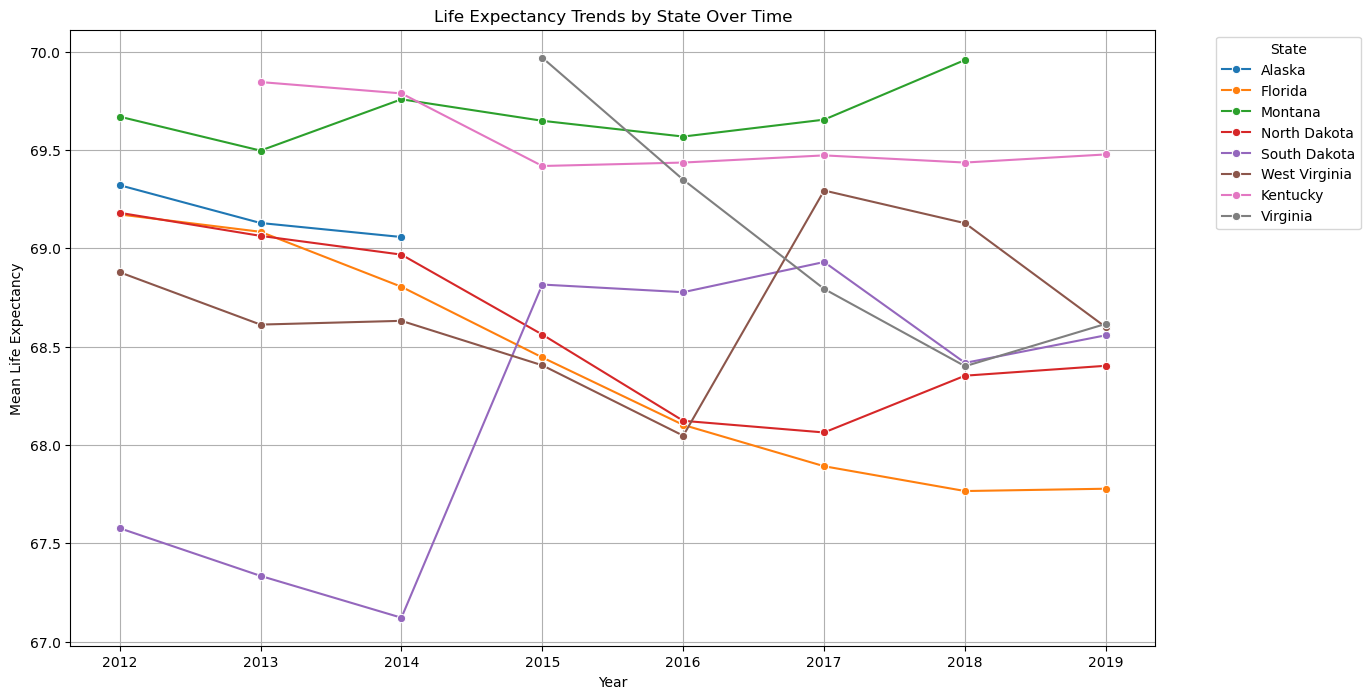

In [167]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=state_trends_low, x='Year', y='mean_life_expectancy', hue='State', marker='o', palette='tab10')
plt.title('Life Expectancy Trends by State Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Life Expectancy')
plt.grid(True)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('../outputs/lineplot_low_le_optimized.png', bbox_inches='tight')
plt.show()

In [171]:
df.to_csv('../data/cleaned/combined_all_years_cleaned_final.csv', index=False)